In [ ]:

from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D,GlobalMaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import sys
import keras
from keras.optimizers import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as k
from keras import regularizers

In [ ]:
!mkdir '/content/dataset'

In [1]:
!cp -r '/content/drive/My Drive/1.PNG' '/content'

In [2]:
import cv2

In [3]:
array = cv2.imread('/content/drive/My Drive/1.PNG')

In [8]:
import os

In [9]:
image_names = os.listdir('/content/drive/My Drive/COVID_19_CNN/dataset/test/COVID')

In [13]:
import numpy as np

In [14]:
array = np.zeros((len(image_names),512,512,3))

In [15]:
array.shape

(250, 512, 512, 3)

In [19]:
for i in range(len(image_names)):
  temp = cv2.imread('/content/drive/My Drive/COVID_19_CNN/dataset/test/COVID/'+image_names[i])
  array[i] = cv2.resize(temp, (512, 512)) 

In [23]:
temp = cv2.imread('/content/drive/My Drive/COVID_19_CNN/dataset/test/COVID/'+image_names[i])
temp = cv2.resize(temp, (512, 512)) 

In [ ]:
array.shape


In [4]:
import matplotlib.pyplot as plt

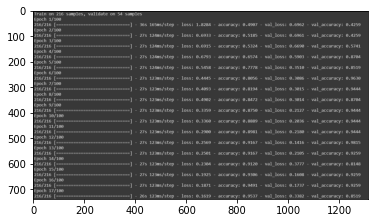

In [5]:
plt.imshow (array)

In [7]:
array.shape

(737, 1313, 3)

In [ ]:
!cp -r '/content/drive/My Drive/COVID_19_CNN/dataset/test' '/content/dataset'


In [ ]:
!cp -r '/content/drive/My Drive/COVID_19_CNN/dataset/train' '/content/dataset'

In [ ]:
nb_classes = 2
img_width, img_height = 248,248
batch_size = 8 # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values)
nb_epoch = 25
learning_rate = 1e-4
model_name = 'Xception_Covid-19_V2.h5'
# momentum = .9  # sgd momentum to avoid local minimum
transformation_ratio = 0.05  # how aggressive will be the data augmentation/transformation

In [ ]:
def generic_CNN():
          classifier = Sequential()
          classifier.add(Convolution2D(32,4,4,input_shape = (256,256,3), activation = 'relu'))
          classifier.add (MaxPooling2D(pool_size=(2,2)))
          classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
          classifier.add(MaxPooling2D(pool_size = (2, 2)))
          classifier.add(Flatten())
          classifier.add(Dense(output_dim = 128, activation = 'relu'))
          classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
          classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
          classifier.summary()
          return classifier

In [ ]:
def(): Xception_CNN
          base_model = keras.applications.Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)
#          for layer in base_model.layers:
#               layer.trainable = False
          x = base_model.output
          x = GlobalMaxPooling2D()(x)
          x = Dropout(0.2)(x)
          x = Dense(512, activation = 'relu')(x)
          top_block = Dense(nb_classes, activation = 'softmax',kernel_regularizer=regularizers.l2(0.01))(x)
          classifier = keras.Model(base_model.input, top_block)
          opt = keras.optimizers.Adam(learning_rate=learning_rate)
          classifier.compile(optimizer = opt, 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
          classifier.summary()
          return classifier

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
classifier = Xception_CNN()
train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   zoom_range = transformation_ratio,
                                   horizontal_flip = True,
                                   vertical_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/dataset/train',
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory('/content/dataset/test',
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')




Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 248, 248, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 123, 123, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 123, 123, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 123, 123, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath = model_name, verbose=1, monitor = 'val_accuracy', save_best_only=True)
history = classifier.fit_generator(training_set,
                         samples_per_epoch =2003,
                         nb_epoch = nb_epoch,
                         verbose=1,
                         callbacks=[annealer, checkpoint],
                         validation_data = validation_set,
                         nb_val_samples = 478)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, callbacks=[<keras.ca..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=25, validation_steps=478)`
  if __name__ == '__main__':


Epoch 1/25
250/250 [==============================] - 124s 497ms/step - loss: 0.4292 - accuracy: 0.8316 - val_loss: 0.5090 - val_accuracy: 0.7260

Epoch 00001: val_accuracy improved from -inf to 0.72598, saving model to Xception_Covid-19_V2.h5
Epoch 2/25
250/250 [==============================] - 114s 457ms/step - loss: 0.2225 - accuracy: 0.9298 - val_loss: 1.5488 - val_accuracy: 0.7211

Epoch 00002: val_accuracy did not improve from 0.72598
Epoch 3/25
250/250 [==============================] - 116s 463ms/step - loss: 0.1756 - accuracy: 0.9544 - val_loss: 0.0631 - val_accuracy: 0.7860

Epoch 00003: val_accuracy improved from 0.72598 to 0.78598, saving model to Xception_Covid-19_V2.h5
Epoch 4/25
250/250 [==============================] - 116s 464ms/step - loss: 0.1232 - accuracy: 0.9699 - val_loss: 2.3534 - val_accuracy: 0.7700

Epoch 00004: val_accuracy did not improve from 0.78598
Epoch 5/25
250/250 [==============================] - 116s 464ms/step - loss: 0.1109 - accuracy: 0.9719 -

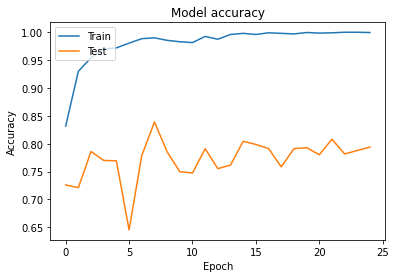

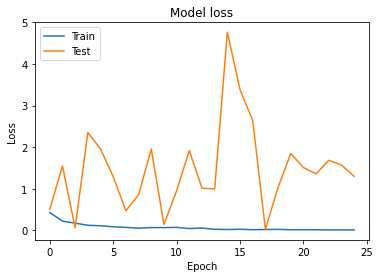

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model = load_model('Xception_Covid-19_V2.h5')
final_loss, final_accuracy = model.evaluate(validation_set)

60/60 [==============================] - 5s 90ms/step


In [ ]:
print (final_loss, final_accuracy)

0.30123797059059143 0.8389121294021606


[1.0000000e+00 4.4837867e-10]


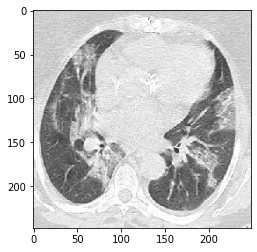

In [ ]:

from keras.preprocessing import image
#path='imbalanced/Scratch/Scratch_400.jpg'
img = image.load_img('/content/dataset/test/COVID/Covid (1022).png', grayscale=False, target_size=(img_width,img_height))
show_img=image.load_img('/content/dataset/test/COVID/Covid (1022).png', grayscale=False,target_size=(img_width,img_height))
disease_class=['Covid-19','Non Covid-19']
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]



In [ ]:
!cp -r '/content/Xception_Covid-19_V2.h5' '/content/drive/My Drive/COVID_19_CNN/models/Xception'